# Algorithms on generated synthetic data

This is a second improved version of testing the algorithms on synthetic data, the older version is in notebook AlgorithmApplication. I am revisiting this topic as I found a useful resource that made better synthetic data using sklearn methods that I didn't use in the first notebook. Link: https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

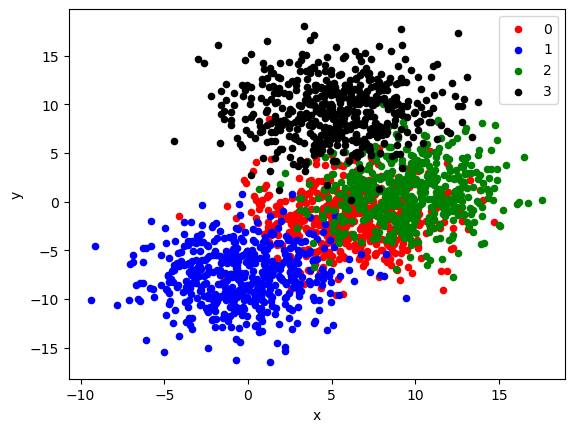

In [2]:
# generate 2d classification dataset
X_blob, y_blob = make_blobs(n_samples=2000, centers=4, n_features=2, cluster_std=3 ,random_state=2812, shuffle=True)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_blob[:,0], y=X_blob[:,1], label=y_blob))
colors = {0:'red', 1:'blue', 2:'green', 3:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

pyplot.savefig('synthetic_plots/blob')
pyplot.show()

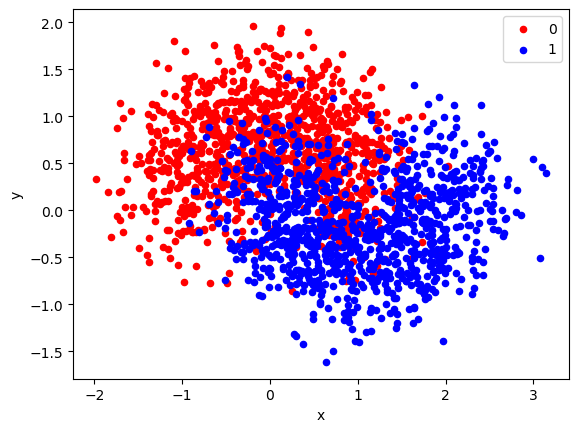

In [3]:
# generate 2d classification dataset
X_moon, y_moon = make_moons(n_samples=2000, noise=0.4, random_state=2812, shuffle=True)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_moon[:,0], y=X_moon[:,1], label=y_moon))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.savefig('synthetic_plots/moon')
pyplot.show()

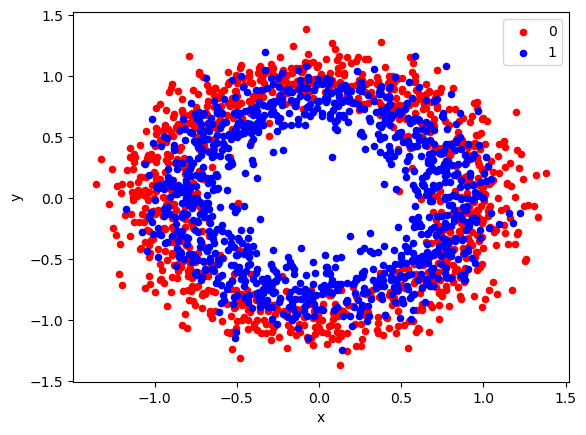

In [4]:
# generate 2d classification dataset
X_circle, y_circle = make_circles(n_samples=2000, noise=0.15, random_state=2812, shuffle=True)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_circle[:,0], y=X_circle[:,1], label=y_circle))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.savefig('synthetic_plots/circle')
pyplot.show()

## Using ML algorithms on the synthetic data

In [5]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob, y_blob, test_size=0.2, random_state=2812)
X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_moon, test_size=0.2, random_state=2812)
X_train_circle, X_test_circle, y_train_circle, y_test_circle = train_test_split(X_blob, y_blob, test_size=0.2, random_state=2812)

In [6]:
data = {'Blob':[X_train_blob, y_train_blob, X_test_blob, y_test_blob],
        'Moon':[X_train_moon, y_train_moon, X_test_moon, y_test_moon],
        'Circle':[X_train_circle, y_train_circle, X_test_circle, y_test_circle]
       }

### KNN classifier

In [7]:
from KNN import KNN_clf

for key in data.keys():
    print(f'---{key} Data---')
    for i in range(1,11): #checking n_neighbours 1,..,10
        # data[key][0] = X_train, data[key][1] = y_train, data[key][2] = X_test, data[key][3] = y_test
        knn = KNN_clf(n_neighbours=i)
        knn.fit(data[key][0],data[key][1])
        preds = knn.predict(data[key][2])
        print(f'(KNN={i}) Model Accuracy: {knn.accuracy_metric(preds, data[key][3]) * 100}%')
    print('')

---Blob Data---
(KNN=1) Model Accuracy: 76.0%
(KNN=2) Model Accuracy: 76.0%
(KNN=3) Model Accuracy: 77.75%
(KNN=4) Model Accuracy: 78.75%
(KNN=5) Model Accuracy: 78.0%
(KNN=6) Model Accuracy: 77.5%
(KNN=7) Model Accuracy: 77.75%
(KNN=8) Model Accuracy: 79.25%
(KNN=9) Model Accuracy: 79.0%
(KNN=10) Model Accuracy: 79.0%

---Moon Data---
(KNN=1) Model Accuracy: 80.25%
(KNN=2) Model Accuracy: 80.25%
(KNN=3) Model Accuracy: 84.0%
(KNN=4) Model Accuracy: 82.75%
(KNN=5) Model Accuracy: 84.5%
(KNN=6) Model Accuracy: 84.5%
(KNN=7) Model Accuracy: 84.5%
(KNN=8) Model Accuracy: 84.25%
(KNN=9) Model Accuracy: 84.0%
(KNN=10) Model Accuracy: 84.25%

---Circle Data---
(KNN=1) Model Accuracy: 76.0%
(KNN=2) Model Accuracy: 76.0%
(KNN=3) Model Accuracy: 77.75%
(KNN=4) Model Accuracy: 78.75%
(KNN=5) Model Accuracy: 78.0%
(KNN=6) Model Accuracy: 77.5%
(KNN=7) Model Accuracy: 77.75%
(KNN=8) Model Accuracy: 79.25%
(KNN=9) Model Accuracy: 79.0%
(KNN=10) Model Accuracy: 79.0%



In [8]:
# Scikit-learn implementation
from sklearn.neighbors import KNeighborsClassifier
print('Scikit-learn KNeighborsClassifier')
for key in data.keys():
    print(f'---{key} Data---')
    for i in range(1,11): #checking n_neighbours 1,..,5
        # data[key][0] = X_train, data[key][1] = y_train, data[key][2] = X_test, data[key][3] = y_test
        knn = KNeighborsClassifier(n_neighbors= i, metric='euclidean')
        knn.fit(data[key][0], data[key][1])
        print(f'(KNN={i}) Model Accuracy: {knn.score(data[key][2], data[key][3]) * 100}%')
    print('')

Scikit-learn KNeighborsClassifier
---Blob Data---
(KNN=1) Model Accuracy: 76.0%
(KNN=2) Model Accuracy: 73.0%
(KNN=3) Model Accuracy: 77.5%
(KNN=4) Model Accuracy: 76.0%
(KNN=5) Model Accuracy: 77.75%
(KNN=6) Model Accuracy: 76.25%
(KNN=7) Model Accuracy: 77.75%
(KNN=8) Model Accuracy: 78.0%
(KNN=9) Model Accuracy: 79.5%
(KNN=10) Model Accuracy: 79.5%

---Moon Data---
(KNN=1) Model Accuracy: 80.25%
(KNN=2) Model Accuracy: 79.0%
(KNN=3) Model Accuracy: 84.0%
(KNN=4) Model Accuracy: 83.75%
(KNN=5) Model Accuracy: 84.5%
(KNN=6) Model Accuracy: 83.75%
(KNN=7) Model Accuracy: 84.5%
(KNN=8) Model Accuracy: 84.5%
(KNN=9) Model Accuracy: 84.0%
(KNN=10) Model Accuracy: 84.0%

---Circle Data---
(KNN=1) Model Accuracy: 76.0%
(KNN=2) Model Accuracy: 73.0%
(KNN=3) Model Accuracy: 77.5%
(KNN=4) Model Accuracy: 76.0%
(KNN=5) Model Accuracy: 77.75%
(KNN=6) Model Accuracy: 76.25%
(KNN=7) Model Accuracy: 77.75%
(KNN=8) Model Accuracy: 78.0%
(KNN=9) Model Accuracy: 79.5%
(KNN=10) Model Accuracy: 79.5%



### Decision Tree Classifier

In [10]:
#Augment the data so label is attached to data
train_data_blob = np.concatenate((X_train_blob, y_train_blob[:,None]),axis=1).tolist()
train_data_moon = np.concatenate((X_train_moon, y_train_moon[:,None]),axis=1).tolist()
train_data_circle = np.concatenate((X_train_circle,y_train_circle[:,None]),axis=1).tolist()

In [11]:
data_dt = {'Blob':[train_data_blob, X_test_blob, y_test_blob],
        'Moon':[train_data_moon, X_test_moon, y_test_moon],
        'Circle':[train_data_circle, X_test_circle, y_test_circle]
       }

In [13]:
from DecisionTree import DecisionTreeClassifier

for key in data_dt.keys():
    print(f'---{key} Data---')
    for i in range(3,8):
        dtc = DecisionTreeClassifier(max_depth=i,min_size=20)
        dtc.fit(data_dt[key][0], print_tree=False)
        print(f'(max_depth={i}) Cross Validation scores: {dtc.evaluate(n_folds=5)}')
        preds = dtc.decision_tree(data_dt[key][1])
        print(f"(max_depth={i}) DTC Test Accuracy: {dtc.accuracy_metric(data_dt[key][2], preds)*100}%")

---Blob Data---
(max_depth=3) Cross Validation scores: [0.778125, 0.775, 0.828125, 0.7875, 0.796875]
(max_depth=3) DTC Test Accuracy: 74.5%
(max_depth=4) Cross Validation scores: [0.853125, 0.80625, 0.803125, 0.78125, 0.803125]
(max_depth=4) DTC Test Accuracy: 76.5%
(max_depth=5) Cross Validation scores: [0.821875, 0.85625, 0.821875, 0.834375, 0.81875]
(max_depth=5) DTC Test Accuracy: 80.25%
(max_depth=6) Cross Validation scores: [0.8, 0.83125, 0.846875, 0.846875, 0.840625]
(max_depth=6) DTC Test Accuracy: 79.75%
(max_depth=7) Cross Validation scores: [0.875, 0.834375, 0.84375, 0.8375, 0.821875]
(max_depth=7) DTC Test Accuracy: 79.75%
---Moon Data---
(max_depth=3) Cross Validation scores: [0.8625, 0.875, 0.825, 0.84375, 0.8375]
(max_depth=3) DTC Test Accuracy: 86.25%
(max_depth=4) Cross Validation scores: [0.8375, 0.88125, 0.88125, 0.80625, 0.85625]
(max_depth=4) DTC Test Accuracy: 86.25%
(max_depth=5) Cross Validation scores: [0.85, 0.875, 0.859375, 0.865625, 0.85]
(max_depth=5) DTC T

In [14]:
# Scikit-learn implementation
from sklearn import tree
print('Scikit-learn Decision Tree Classifier:')
for key in data.keys():
    print(f'---{key} Data---')
    for i in range(3,8):
        # data[key][0] = X_train, data[key][1] = y_train, data[key][2] = X_test, data[key][3] = y_test
        clf = tree.DecisionTreeClassifier(max_depth=i,min_samples_split=20)
        clf = clf.fit(data[key][0], data[key][1])
        print(f"(max_depth={i}) DTC Test Accuracy: {clf.score(data[key][2], data[key][3]) * 100}%")
        

Scikit-learn Decision Tree Classifier:
---Blob Data---
(max_depth=3) DTC Test Accuracy: 74.75%
(max_depth=4) DTC Test Accuracy: 76.75%
(max_depth=5) DTC Test Accuracy: 79.75%
(max_depth=6) DTC Test Accuracy: 79.0%
(max_depth=7) DTC Test Accuracy: 78.75%
---Moon Data---
(max_depth=3) DTC Test Accuracy: 86.0%
(max_depth=4) DTC Test Accuracy: 86.0%
(max_depth=5) DTC Test Accuracy: 85.0%
(max_depth=6) DTC Test Accuracy: 83.75%
(max_depth=7) DTC Test Accuracy: 84.5%
---Circle Data---
(max_depth=3) DTC Test Accuracy: 74.75%
(max_depth=4) DTC Test Accuracy: 76.75%
(max_depth=5) DTC Test Accuracy: 79.75%
(max_depth=6) DTC Test Accuracy: 79.0%
(max_depth=7) DTC Test Accuracy: 78.75%


### Support Vector Machine

In [12]:
from SVM import SVM
for key in data.keys():
    # data[key][0] = X_train, data[key][1] = y_train, data[key][2] = X_test, data[key][3] = y_test
    print(f'---{key} Data---')
    gamma = [1/(data[key][0].shape[1] * np.var(data[key][0])), 1/(data[key][0].shape[1]), data[key][0].shape[1], 1, 10, 100]
    for x in gamma:
        svm = SVM(kernel='rbf', C=1, gamma=x)
        svm.fit(data[key][0], data[key][1])
        print(f'(gamma={round(x,3)}) SVM Test Accuracy: {svm.evaluate(data[key][2], data[key][3])[0]} %')

---Blob Data---
(gamma=0.012) SVM Test Accuracy: 26.75 %
(gamma=0.5) SVM Test Accuracy: 25.25 %
(gamma=2) SVM Test Accuracy: 58.75 %
(gamma=1) SVM Test Accuracy: 80.5 %
(gamma=10) SVM Test Accuracy: 77.25 %
(gamma=100) SVM Test Accuracy: 74.0 %
---Moon Data---
(gamma=0.753) SVM Test Accuracy: 45.0 %
(gamma=0.5) SVM Test Accuracy: 36.5 %
(gamma=2) SVM Test Accuracy: 52.25 %
(gamma=1) SVM Test Accuracy: 49.0 %
(gamma=10) SVM Test Accuracy: 23.75 %
(gamma=100) SVM Test Accuracy: 42.25 %
---Circle Data---
(gamma=0.012) SVM Test Accuracy: 26.75 %
(gamma=0.5) SVM Test Accuracy: 25.25 %
(gamma=2) SVM Test Accuracy: 58.75 %
(gamma=1) SVM Test Accuracy: 80.5 %
(gamma=10) SVM Test Accuracy: 77.25 %
(gamma=100) SVM Test Accuracy: 74.0 %


In [11]:
# Scikit-learn implementation
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
print('Scikit-learn OneVsRestClassifier SVC:')
for key in data.keys():
    # data[key][0] = X_train, data[key][1] = y_train, data[key][2] = X_test, data[key][3] = y_test
    print(f'---{key} Data---')
    gamma = [1/(data[key][0].shape[1] * np.var(data[key][0])), 1/(data[key][0].shape[1]), data[key][0].shape[1], 1, 10, 100]
    for x in gamma:
        clf = OneVsRestClassifier(SVC(kernel='rbf', C=1, gamma=x)).fit(data[key][0],data[key][1])
        print(f'(gamma={round(x,3)}) OneVsRestClassifier SVC Test Accuracy: {clf.score(data[key][2], data[key][3])*100} %')

Scikit-learn OneVsRestClassifier SVC:
---Blob Data---
(gamma=0.012) OneVsRestClassifier SVC Test Accuracy: 80.75 %
(gamma=0.5) OneVsRestClassifier SVC Test Accuracy: 81.25 %
(gamma=2) OneVsRestClassifier SVC Test Accuracy: 78.0 %
(gamma=1) OneVsRestClassifier SVC Test Accuracy: 79.5 %
(gamma=10) OneVsRestClassifier SVC Test Accuracy: 75.0 %
(gamma=100) OneVsRestClassifier SVC Test Accuracy: 50.5 %
---Moon Data---
(gamma=0.753) OneVsRestClassifier SVC Test Accuracy: 47.75 %
(gamma=0.5) OneVsRestClassifier SVC Test Accuracy: 47.5 %
(gamma=2) OneVsRestClassifier SVC Test Accuracy: 46.5 %
(gamma=1) OneVsRestClassifier SVC Test Accuracy: 47.75 %
(gamma=10) OneVsRestClassifier SVC Test Accuracy: 46.25 %
(gamma=100) OneVsRestClassifier SVC Test Accuracy: 46.25 %
---Circle Data---
(gamma=0.012) OneVsRestClassifier SVC Test Accuracy: 80.75 %
(gamma=0.5) OneVsRestClassifier SVC Test Accuracy: 81.25 %
(gamma=2) OneVsRestClassifier SVC Test Accuracy: 78.0 %
(gamma=1) OneVsRestClassifier SVC Test A

### CNN Classifier

In [7]:
import numpy as np
from sklearn.decomposition import PCA

In [8]:
pca_synth = PCA(n_components=2)

In [9]:
# generate 2d classification dataset
X_blob, y_blob = make_blobs(n_samples=2000, centers=4, n_features=520, cluster_std=4 ,random_state=2812, shuffle=True)
X_blob_reduced = pca_synth.fit_transform(X_blob)

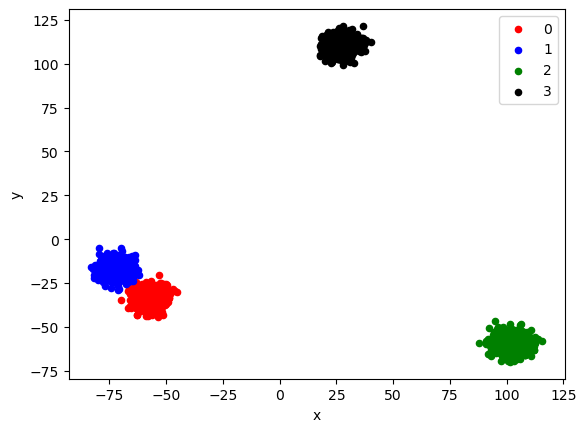

In [10]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_blob_reduced[:,0], y=X_blob_reduced[:,1], label=y_blob))
colors = {0:'red', 1:'blue', 2:'green', 3:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.savefig('synthetic_plots/blob_cnn_clf')
pyplot.show()

There are two methods to make the size of the data into a nxn square, can use pca to reduce dimensions to fit a nxn square, alternatively can add information to each row of data to make it fit a nxn square. 

In [11]:
# Method 1: Using PCA to reduce the data to fit NxN square
pca = PCA(n_components = 400) # Reduces data to fit 20x20 dimension
X_blob_transformed = pca.fit_transform(X_blob)

# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob_transformed.reshape(len(X_blob),20,20), y_blob, test_size=0.2, random_state=2812)

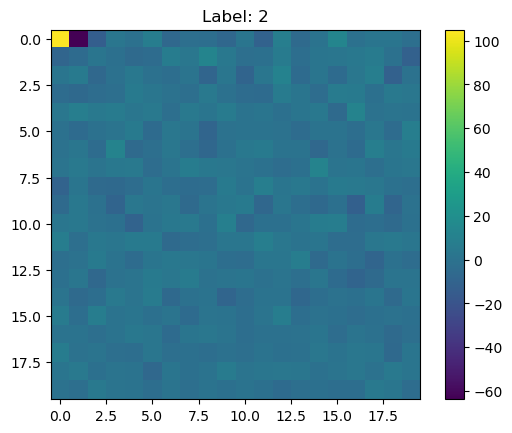

In [12]:
import matplotlib.pyplot as plt
single_image = X_train_blob[0]
plt.imshow(single_image)
plt.title(f'Label: {y_train_blob[0]}')
plt.colorbar()
plt.savefig('synthetic_plots/cnn_clf_m1_img')
plt.show()

In [27]:
from CNN import CNNClassifier

cnn = CNNClassifier(n_classes=4) # There are four classes
cnn.fit(X_train_blob, y_train_blob, X_test_blob, y_test_blob)
cnn.train(num_epochs=10,eval_train=True)

Epoch [1/10], Step [16/16], Loss: 0.8432
Training Accuracy: 79.0
Test Accuracy 79.0
------------------------------
Epoch [2/10], Step [16/16], Loss: 0.2720
Training Accuracy: 95.0
Test Accuracy 95.0
------------------------------
Epoch [3/10], Step [16/16], Loss: 0.1217
Training Accuracy: 97.75
Test Accuracy 99.25
------------------------------
Epoch [4/10], Step [16/16], Loss: 0.0731
Training Accuracy: 97.6875
Test Accuracy 99.25
------------------------------
Epoch [5/10], Step [16/16], Loss: 0.1186
Training Accuracy: 99.0
Test Accuracy 99.0
------------------------------
Epoch [6/10], Step [16/16], Loss: 0.0145
Training Accuracy: 99.0
Test Accuracy 99.25
------------------------------
Epoch [7/10], Step [16/16], Loss: 0.0282
Training Accuracy: 99.375
Test Accuracy 99.5
------------------------------
Epoch [8/10], Step [16/16], Loss: 0.0157
Training Accuracy: 99.25
Test Accuracy 99.5
------------------------------
Epoch [9/10], Step [16/16], Loss: 0.0249
Training Accuracy: 99.4375
Te

In [13]:
X_blob.shape

(2000, 520)

In [14]:
# Method 2: Augmenting the data to fit NxN square
X_blob_aug = np.empty((2000,529))
for x in range(len(X_blob)):
    X_blob_aug[x] = np.concatenate((X_blob[x], np.zeros(9)))
X_blob_aug.shape

(2000, 529)

In [15]:
X_blob_aug[0,520:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob_aug.reshape(len(X_blob),23,23), y_blob, test_size=0.2, random_state=2812)

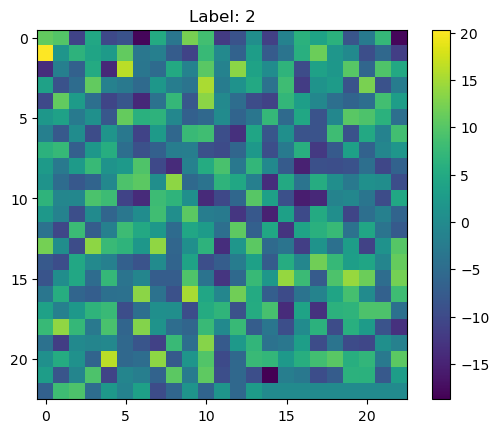

In [17]:
import matplotlib.pyplot as plt
single_image = X_train_blob[0]
plt.imshow(single_image)
plt.title(f'Label: {y_train_blob[0]}')
plt.colorbar()
pyplot.savefig('synthetic_plots/cnn_clf_m2_img')
plt.show()

In [19]:
from CNN import CNNClassifier

cnn = CNNClassifier(n_classes=4) # There are four classes
cnn.fit(X_train_blob, y_train_blob, X_test_blob, y_test_blob)
cnn.train(num_epochs=10,eval_train=True)

Epoch [1/10], Step [16/16], Loss: 0.3781
Training Accuracy: 95.6875
Test Accuracy 96.75
------------------------------
Epoch [2/10], Step [16/16], Loss: 0.0588
Training Accuracy: 99.5
Test Accuracy 100.0
------------------------------
Epoch [3/10], Step [16/16], Loss: 0.0119
Training Accuracy: 100.0
Test Accuracy 99.75
------------------------------
Epoch [4/10], Step [16/16], Loss: 0.0050
Training Accuracy: 99.9375
Test Accuracy 100.0
------------------------------
Epoch [5/10], Step [16/16], Loss: 0.0035
Training Accuracy: 100.0
Test Accuracy 100.0
------------------------------
Epoch [6/10], Step [16/16], Loss: 0.0027
Training Accuracy: 100.0
Test Accuracy 100.0
------------------------------
Epoch [7/10], Step [16/16], Loss: 0.0029
Training Accuracy: 100.0
Test Accuracy 100.0
------------------------------
Epoch [8/10], Step [16/16], Loss: 0.0009
Training Accuracy: 100.0
Test Accuracy 100.0
------------------------------
Epoch [9/10], Step [16/16], Loss: 0.0012
Training Accuracy: 1

## Regression ML Algorithms

In [18]:
# Making synthetic data using make_regression
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=2000, noise=1.0, random_state=2812)

In [19]:
X_reg.shape, y_reg.shape

((2000, 100), (2000,))

In [20]:
X_blob, _ = make_blobs(n_samples=2000, centers=4, n_features=520, cluster_std=4 ,random_state=2812, shuffle=True)
from sklearn.decomposition import PCA
pca_blob = PCA(n_components=2)
y_blob = pca_blob.fit_transform(X_blob) # Use PCA to get regression labels for the X data

In [21]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=2812)
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob, y_blob, test_size=0.2, random_state=2812)

In [22]:
data = {'make_regression':[X_train_reg, y_train_reg, X_test_reg, y_test_reg],
       'Blob PC1':[X_train_blob, y_train_blob[:,0], X_test_blob, y_test_blob[:,0]],
        'Blob PC2':[X_train_blob, y_train_blob[:,1], X_test_blob, y_test_blob[:,1]]
       }

### KNN Regressor

In [7]:
from KNN import KNN_reg
from sklearn.decomposition import PCA

pca = PCA(n_components=10) # Using PCA to speed up algorithm performance

for key in data.keys():
    print(f'---{key} Data---')
    for i in range(1,11): #checking n_neighbours 1,..,10
        # data[key][0] = X_train, data[key][1] = y_train, data[key][2] = X_test, data[key][3] = y_test
        knn = KNN_reg(n_neighbours=i)
        knn.fit(pca.fit_transform(data[key][0]),data[key][1])
        preds = knn.predict(pca.fit_transform(data[key][2]))
        print(f'(KNN={i})')
        print(f'Test MSE: {knn.MSE_metric(preds, data[key][3])}')
        print(f'Test R^2: {knn.r2_metric(preds, data[key][3])}')

---make_regression Data---
(KNN=1)
Test MSE: 42449.14584722677
Test R^2: -1.099805137399613
(KNN=2)
Test MSE: 30644.964128408563
Test R^2: -0.5158951217498542
(KNN=3)
Test MSE: 26349.473301298203
Test R^2: -0.30341278491130286
(KNN=4)
Test MSE: 25045.1505578681
Test R^2: -0.23889267401581793
(KNN=5)
Test MSE: 24327.33536425675
Test R^2: -0.20338496234894032
(KNN=6)
Test MSE: 24542.366759161716
Test R^2: -0.21402178480347467
(KNN=7)
Test MSE: 24399.328814376993
Test R^2: -0.20694621696088444
(KNN=8)
Test MSE: 24823.722368670773
Test R^2: -0.22793942537060397
(KNN=9)
Test MSE: 23064.25006631575
Test R^2: -0.14090471817310246
(KNN=10)
Test MSE: 22417.291192873585
Test R^2: -0.10890201142773481
---Blob PC1 Data---
(KNN=1)
Test MSE: 92.86015881562162
Test R^2: 0.9811762829344878
(KNN=2)
Test MSE: 91.99311167470725
Test R^2: 0.9813520423804245
(KNN=3)
Test MSE: 91.49261033180237
Test R^2: 0.9814534991923654
(KNN=4)
Test MSE: 89.14513854189755
Test R^2: 0.9819293560652809
(KNN=5)
Test MSE: 89

In [9]:
X_train_blob.shape, y_train_blob.shape, X_test_blob.shape, y_test_blob.shape

((1600, 520), (1600, 2), (400, 520), (400, 2))

In [8]:
# Multi label KNN Regressor
from sklearn.decomposition import PCA
pca = PCA(n_components=10) # Using PCA to speed up algorithm performance

for i in range(1,11):
    knn = KNN_reg(n_neighbours=i, n_targets=2)
    knn.fit(pca.fit_transform(X_train_blob), y_train_blob)
    preds = knn.predict(pca.fit_transform(X_test_blob))
    print(f'(KNN={i})')
    print(f'Test MSE: {knn.MSE_metric(preds, y_test_blob)}')
    print(f'Test R^2: {knn.r2_metric(preds, y_test_blob)}')

(KNN=1)
Test MSE: 98.28901087884178
Test R^2: 0.9789738402955666
(KNN=2)
Test MSE: 95.06708139295138
Test R^2: 0.9796676983254748
(KNN=3)
Test MSE: 93.45758032457084
Test R^2: 0.9800117513773842
(KNN=4)
Test MSE: 93.894290478481
Test R^2: 0.9799059942971309
(KNN=5)
Test MSE: 95.18860334671726
Test R^2: 0.9796044515614856
(KNN=6)
Test MSE: 96.03709228646701
Test R^2: 0.9794217695530149
(KNN=7)
Test MSE: 94.15332458325149
Test R^2: 0.9798424203697972
(KNN=8)
Test MSE: 96.4893986660543
Test R^2: 0.9793449232703493
(KNN=9)
Test MSE: 96.22509674172565
Test R^2: 0.9793988180807719
(KNN=10)
Test MSE: 96.71611852107254
Test R^2: 0.9792966686291539


In [44]:
# scikit learn implementation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.decomposition import PCA

pca = PCA(n_components=10) # Using PCA to speed up algorithm performance

for key in data.keys():
    print(f'---{key} Data---')
    for i in range(1,11): #checking n_neighbours 1,..,10
        # data[key][0] = X_train, data[key][1] = y_train, data[key][2] = X_test, data[key][3] = y_test
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(pca.fit_transform(data[key][0]),data[key][1])
        print(f'(KNN={i})')
        print(f'Test MSE: {MSE(data[key][3], knn.predict(pca.fit_transform(data[key][2])))}')
        print(f'Test R^2: {knn.score(pca.fit_transform(data[key][2]), data[key][3])}')

---make_regression Data---
(KNN=1)
Test MSE: 37405.15918837778
Test R^2: -0.85029742910922
(KNN=2)
Test MSE: 32049.80888932504
Test R^2: -0.5853876919145866
(KNN=3)
Test MSE: 28552.22353914503
Test R^2: -0.41237484229840504
(KNN=4)
Test MSE: 24746.94113808489
Test R^2: -0.22414133664061264
(KNN=5)
Test MSE: 23317.3134002693
Test R^2: -0.15342284258096628
(KNN=6)
Test MSE: 26738.819242150857
Test R^2: -0.3226723151211788
(KNN=7)
Test MSE: 25359.496551450156
Test R^2: -0.25444222911452696
(KNN=8)
Test MSE: 25175.1215452227
Test R^2: -0.24532186691270907
(KNN=9)
Test MSE: 22855.139191947124
Test R^2: -0.130560762375602
(KNN=10)
Test MSE: 22790.628668645153
Test R^2: -0.12736966098728852
---Blob PC1 Data---
(KNN=1)
Test MSE: 94.62449041074866
Test R^2: 0.982146451664252
(KNN=2)
Test MSE: 91.00107449243694
Test R^2: 0.9817732253394303
(KNN=3)
Test MSE: 88.97615271914549
Test R^2: 0.982126336243387
(KNN=4)
Test MSE: 89.99698169338946
Test R^2: 0.9818924575738949
(KNN=5)
Test MSE: 89.62606745

In [10]:
# scikit learn implementation (Multi-label)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.decomposition import PCA

pca = PCA(n_components=10) # Using PCA to speed up algorithm performance

for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(pca.fit_transform(X_train_blob), y_train_blob)
    print(f'(KNN={i})')
    print(f'Test MSE: {MSE(y_test_blob, knn.predict(pca.fit_transform(X_test_blob)))}')
    print(f'Test R^2: {knn.score(pca.fit_transform(X_test_blob), y_test_blob)}')

(KNN=1)
Test MSE: 98.94289366521255
Test R^2: 0.9790010358564196
(KNN=2)
Test MSE: 96.44946439802334
Test R^2: 0.9800787048333693
(KNN=3)
Test MSE: 96.39720871744544
Test R^2: 0.9797724166418467
(KNN=4)
Test MSE: 95.12728715121892
Test R^2: 0.9800439655725243
(KNN=5)
Test MSE: 94.6694209122698
Test R^2: 0.9799764937668339
(KNN=6)
Test MSE: 94.49755165397553
Test R^2: 0.9796737497682835
(KNN=7)
Test MSE: 95.00782869792123
Test R^2: 0.9795526014820828
(KNN=8)
Test MSE: 95.53930574449976
Test R^2: 0.9794547533211315
(KNN=9)
Test MSE: 96.05747898678166
Test R^2: 0.9794655540279305
(KNN=10)
Test MSE: 96.37623176191818
Test R^2: 0.9793613242007433


### Decision Tree Regressor

In [25]:
#Augment data to have label with X sample
from sklearn.decomposition import PCA
pca = PCA(n_components=10) # Using PCA to speed up algorithm performance

train_data_reg = np.concatenate((pca.fit_transform(X_train_reg), y_train_reg[:,None]),axis=1).tolist()
train_data_pc1 = np.concatenate((pca.fit_transform(X_train_blob), y_train_blob[:,0,None]),axis=1).tolist()
train_data_pc2 = np.concatenate((pca.fit_transform(X_train_blob), y_train_blob[:,1,None]),axis=1).tolist()

data_dt = {'make_regression':[train_data_reg, pca.fit_transform(X_test_reg), y_test_reg],
          'Blob PC1':[train_data_pc1, pca.fit_transform(X_test_blob), y_test_blob[:,0]],
          'Blob PC2':[train_data_pc2, pca.fit_transform(X_test_blob), y_test_blob[:,1]]
         }

In [26]:
from DecisionTree import DecisionTreeRegressor
from sklearn.metrics import r2_score

for key in data_dt.keys():
    print(f'---{key} Data---')
    for i in range(3,8):
        dtr = DecisionTreeRegressor(max_depth=i,min_size=20)
        dtr.fit(data_dt[key][0], print_tree=False)
        print(f'(max_depth={i})')
        print(f'Cross Validation scores: {dtr.evaluate(n_folds=5)}')
        preds = dtr.decision_tree(data_dt[key][1])
        print(f"DTR Test MSE: {dtr.accuracy_metric(data_dt[key][2], preds)}")
        print(f"DTR Test R^2: {r2_score(data_dt[key][2], preds)}")
        

---make_regression Data---
(max_depth=3)
Cross Validation scores: [16355.21231896079, 16782.940019560985, 17044.296556385794, 18284.58465771998, 14699.861902867622]
DTR Test MSE: 20993.326184959133
DTR Test R^2: -0.038463632058285624
(max_depth=4)
Cross Validation scores: [16604.467176760256, 15780.136783992184, 15099.78392511229, 15598.166197180199, 14908.131085324134]
DTR Test MSE: 23777.157644698756
DTR Test R^2: -0.1761696679312732
(max_depth=5)
Cross Validation scores: [15034.738135799253, 15414.649398536625, 12667.523477356424, 16152.7004980843, 13431.657174168175]
DTR Test MSE: 26715.062614252314
DTR Test R^2: -0.3214971609852586
(max_depth=6)
Cross Validation scores: [13945.374165005622, 13887.552657131455, 13374.058134575389, 13054.770283486328, 13111.717141847079]
DTR Test MSE: 27645.055643396452
DTR Test R^2: -0.36750053988411246
(max_depth=7)
Cross Validation scores: [12327.795335977673, 14275.090207605544, 12963.08694286897, 10298.33776560008, 11681.878055170815]
DTR Test 

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10) # Using PCA to speed up algorithm performance

data = {'make_regression':[pca.fit_transform(X_train_reg), y_train_reg, pca.fit_transform(X_test_reg), y_test_reg],
        'Blob PC1':[pca.fit_transform(X_train_blob), y_train_blob[:,0], pca.fit_transform(X_test_blob), y_test_blob[:,0]],
        'Blob PC2':[pca.fit_transform(X_train_blob), y_train_blob[:,1], pca.fit_transform(X_test_blob), y_test_blob[:,1]]
       }

In [21]:
# Scikit-learn implementation
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
print('Scikit-learn Decision Tree Regressor:')
for key in data.keys():
    print(f'---{key} Data---')
    for i in range(3,8):
        # data[key][0] = X_train, data[key][1] = y_train, data[key][2] = X_test, data[key][3] = y_test
        reg = tree.DecisionTreeRegressor(max_depth=i,min_samples_split=20)
        reg.fit(data[key][0], data[key][1])
        pred = reg.predict(data[key][2])
        print(f'(max_depth={i})')
        print(f'DTR Test MSE: {MSE(data[key][3], pred)}')
        print(f"DTR Test R^2: {reg.score(data[key][2], data[key][3])}")

Scikit-learn Decision Tree Regressor:
---make_regression Data---
(max_depth=3)
DTR Test MSE: 21541.95977098412
DTR Test R^2: -0.06560254379590558
(max_depth=4)
DTR Test MSE: 24754.91338476092
DTR Test R^2: -0.2245356947411783
(max_depth=5)
DTR Test MSE: 27073.624242816408
DTR Test R^2: -0.3392339030257925
(max_depth=6)
DTR Test MSE: 28855.65516998842
DTR Test R^2: -0.42738450349600754
(max_depth=7)
DTR Test MSE: 29541.95330881527
DTR Test R^2: -0.4613331808824235
---Blob PC1 Data---
(max_depth=3)
DTR Test MSE: 46.70309762700549
DTR Test R^2: 0.9905327978432678
(max_depth=4)
DTR Test MSE: 48.97855775599036
DTR Test R^2: 0.9900715384807148
(max_depth=5)
DTR Test MSE: 58.51921432172241
DTR Test R^2: 0.988137548467095
(max_depth=6)
DTR Test MSE: 63.784334202954796
DTR Test R^2: 0.9870702540727669
(max_depth=7)
DTR Test MSE: 62.39288952002519
DTR Test R^2: 0.9873523143379856
---Blob PC2 Data---
(max_depth=3)
DTR Test MSE: 202.21118116878344
DTR Test R^2: 0.9546417829906962
(max_depth=4)
DTR

### Linear Regression

In [36]:
from LinearRegression import LinearRegression
from sklearn.metrics import r2_score

for key in data.keys():
    # data[key][0] = X_train, data[key][1] = y_train, data[key][2] = X_test, data[key][3] = y_test
    print(f'---{key} Data---')
    lr_model = LinearRegression()
    lr_model.fit(data[key][0], data[key][1])
    pred_Train, pred_Test, MSEtrain, MSEtest = lr_model.predict(data[key][2], data[key][3])
    print(f'Train R^2: {r2_score(data[key][1], pred_Train)}')
    print(f'Test R^2: {r2_score(data[key][3], pred_Test)}')

---make_regression Data---
MSEtrain:  0.9081188908170897
MSEtest:  1.0935761659585124
Train R^2: 0.9999520592037785
Test R^2: 0.9999459047571962
---Blob PC1 Data---
MSEtrain:  1.414773265343863e-23
MSEtest:  2.3340875849128243e-23
Train R^2: 1.0
Test R^2: 1.0
---Blob PC2 Data---
MSEtrain:  1.7335959821888954e-23
MSEtest:  2.7818919397940495e-23
Train R^2: 1.0
Test R^2: 1.0


In [37]:
# scikit learn implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

for key in data.keys():
    # data[key][0] = X_train, data[key][1] = y_train, data[key][2] = X_test, data[key][3] = y_test
    print(f'---{key} Data---')
    reg = LinearRegression().fit(data[key][0], data[key][1])
    print(f'MSEtrain: {MSE(data[key][1], reg.predict(data[key][0]))}')
    print(f'MSEtset: {MSE(data[key][3], reg.predict(data[key][2]))}')
    print(f'Train R^2: {reg.score(data[key][0], data[key][1])}')
    print(f'Test R^2: {reg.score(data[key][2], data[key][3])}')

---make_regression Data---
MSEtrain: 0.908118890817087
MSEtset: 1.093576165958539
Train R^2: 0.9999520592037785
Test R^2: 0.9999459047571962
---Blob PC1 Data---
MSEtrain: 1.1241315231053731e-26
MSEtset: 1.1934108655236929e-26
Train R^2: 1.0
Test R^2: 1.0
---Blob PC2 Data---
MSEtrain: 5.5948229139189436e-27
MSEtset: 8.665506881803453e-27
Train R^2: 1.0
Test R^2: 1.0


### CNN Regressor

In [23]:
X_blob.shape, y_blob.shape

((2000, 520), (2000, 2))

In [24]:
# Method 1: Using PCA to reduce the data to fit NxN square
pca = PCA(n_components = 400) # Reduces data to fit 20x20 dimension
X_blob_transformed = pca.fit_transform(X_blob)

# Splitting data into train and test
from sklearn.model_selection import train_test_split
# Only Target 1
X_train_blob0, X_test_blob0, y_train_blob0, y_test_blob0 = train_test_split(X_blob_transformed.reshape(len(X_blob),20,20), y_blob[:,0], test_size=0.2, random_state=2812)
# Only Target 2
X_train_blob1, X_test_blob1, y_train_blob1, y_test_blob1 = train_test_split(X_blob_transformed.reshape(len(X_blob),20,20), y_blob[:,1], test_size=0.2, random_state=2812)
# Both targets
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob_transformed.reshape(len(X_blob),20,20), y_blob, test_size=0.2, random_state=2812)

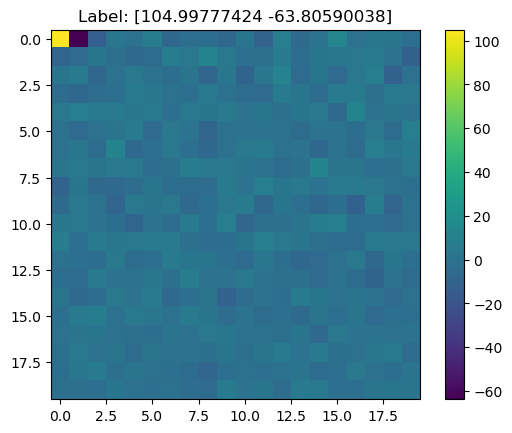

In [25]:
import matplotlib.pyplot as plt
single_image = X_train_blob[0]
plt.imshow(single_image)
plt.title(f'Label: {y_train_blob[0]}')
plt.colorbar()
pyplot.savefig('synthetic_plots/cnn_reg_m1_img')
plt.show()

In [16]:
from CNN import CNNRegressor

cnn = CNNRegressor()
cnn.fit(X_train_blob0, y_train_blob0, X_test_blob0, y_test_blob0)
cnn.train(num_epochs=10,eval_train=True)

Epoch [1/10], Step [16/16], Loss: 4309.7954
Training MSE: 4104.865398357308
Training r^2: 0.17262616663468766
Test MSE: 4112.891171915658
Test r^2: 0.16627431322398467
------------------------------
Epoch [2/10], Step [16/16], Loss: 1497.9911
Training MSE: 1430.142503487558
Training r^2: 0.7117414648617093
Test MSE: 1266.970548451565
Test r^2: 0.7431719327958239
------------------------------
Epoch [3/10], Step [16/16], Loss: 680.9322
Training MSE: 787.0938669442727
Training r^2: 0.8413539044307385
Test MSE: 682.6690448323109
Test r^2: 0.8616159062496227
------------------------------
Epoch [4/10], Step [16/16], Loss: 688.7349
Training MSE: 591.1408131870369
Training r^2: 0.8808500655433189
Test MSE: 632.9159983937948
Test r^2: 0.8717013638686717
------------------------------
Epoch [5/10], Step [16/16], Loss: 522.9073
Training MSE: 503.61699076677075
Training r^2: 0.898491308223757
Test MSE: 468.48424746559175
Test r^2: 0.9050333848537659
------------------------------
Epoch [6/10], S

In [17]:
cnn2 = CNNRegressor()
cnn2.fit(X_train_blob1, y_train_blob1, X_test_blob1, y_test_blob1)
cnn2.train(num_epochs=10,eval_train=True)

Epoch [1/10], Step [16/16], Loss: 3162.2615
Training MSE: 3641.355331439357
Training r^2: 0.14886326822218499
Test MSE: 3798.4336103553674
Test r^2: 0.14796909498696886
------------------------------
Epoch [2/10], Step [16/16], Loss: 1317.1310
Training MSE: 1431.5675639132967
Training r^2: 0.6653829069670538
Test MSE: 1527.1590537819307
Test r^2: 0.6574412391844313
------------------------------
Epoch [3/10], Step [16/16], Loss: 590.8479
Training MSE: 633.9981795754636
Training r^2: 0.8518081619943974
Test MSE: 608.890427535947
Test r^2: 0.8634191048472089
------------------------------
Epoch [4/10], Step [16/16], Loss: 395.9862
Training MSE: 408.2338069480112
Training r^2: 0.9045787200328856
Test MSE: 460.40783561600927
Test r^2: 0.8967254030442542
------------------------------
Epoch [5/10], Step [16/16], Loss: 298.4089
Training MSE: 327.5198584603133
Training r^2: 0.9234449387207884
Test MSE: 344.6268033913173
Test r^2: 0.9226963748995061
------------------------------
Epoch [6/10],

In [18]:
from CNN import CNNRegressor

cnn3 = CNNRegressor(n_targets=2)
cnn3.fit(X_train_blob, y_train_blob, X_test_blob, y_test_blob)
cnn3.train(num_epochs=10,eval_train=True)

Epoch [1/10], Step [16/16], Loss: 3921.5378
Training MSE: 4036.4453125
Training r^2: 0.12864357507464375
Test MSE: 4146.39208984375
Test r^2: 0.1184941414640922
------------------------------
Epoch [2/10], Step [16/16], Loss: 2525.1289
Training MSE: 2364.244140625
Training r^2: 0.4946594370509503
Test MSE: 2415.62158203125
Test r^2: 0.48937587214641176
------------------------------
Epoch [3/10], Step [16/16], Loss: 1198.6774
Training MSE: 1306.696044921875
Training r^2: 0.7164660151923123
Test MSE: 1302.024169921875
Test r^2: 0.7223495970999334
------------------------------
Epoch [4/10], Step [16/16], Loss: 779.1279
Training MSE: 728.6355590820312
Training r^2: 0.8427169837296983
Test MSE: 756.531982421875
Test r^2: 0.839578166617911
------------------------------
Epoch [5/10], Step [16/16], Loss: 598.7881
Training MSE: 552.1494750976562
Training r^2: 0.8813304315819774
Test MSE: 507.5282287597656
Test r^2: 0.8926129263938851
------------------------------
Epoch [6/10], Step [16/16],

In [26]:
# Method 2: Augmenting the data to fit NxN square
X_blob_aug = np.empty((2000,529))
for x in range(len(X_blob)):
    X_blob_aug[x] = np.concatenate((X_blob[x], np.zeros(9)))
X_blob_aug.shape

(2000, 529)

In [27]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
# Only Target 1
X_train_blob0, X_test_blob0, y_train_blob0, y_test_blob0 = train_test_split(X_blob_aug.reshape(len(X_blob_aug),23,23), y_blob[:,0], test_size=0.2, random_state=2812)
# Only Target 2
X_train_blob1, X_test_blob1, y_train_blob1, y_test_blob1 = train_test_split(X_blob_aug.reshape(len(X_blob_aug),23,23), y_blob[:,1], test_size=0.2, random_state=2812)
# Both targets
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob_aug.reshape(len(X_blob_aug),23,23), y_blob, test_size=0.2, random_state=2812)

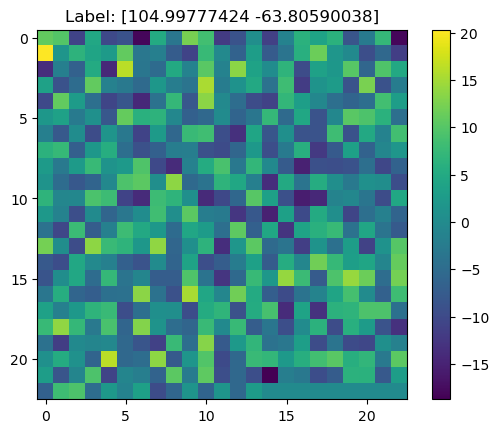

In [28]:
import matplotlib.pyplot as plt
single_image = X_train_blob[0]
plt.imshow(single_image)
plt.title(f'Label: {y_train_blob[0]}')
plt.colorbar()
plt.savefig('synthetic_plots/cnn_reg_m2_img')
plt.show()

In [22]:
from CNN import CNNRegressor

In [23]:
cnn = CNNRegressor()
cnn.fit(X_train_blob0, y_train_blob0, X_test_blob0, y_test_blob0)
cnn.train(num_epochs=10,eval_train=True)

Epoch [1/10], Step [16/16], Loss: 3472.2825
Training MSE: 3183.3488552319577
Training r^2: 0.35836640427723376
Test MSE: 3206.659519012997
Test r^2: 0.3499768660292234
------------------------------
Epoch [2/10], Step [16/16], Loss: 563.3073
Training MSE: 411.40812942729
Training r^2: 0.9170768614644362
Test MSE: 463.6326968103387
Test r^2: 0.9060168452484136
------------------------------
Epoch [3/10], Step [16/16], Loss: 331.9947
Training MSE: 314.61895209403696
Training r^2: 0.9365856217227874
Test MSE: 319.71676771961216
Test r^2: 0.9351900963508206
------------------------------
Epoch [4/10], Step [16/16], Loss: 214.4187
Training MSE: 236.1500064971454
Training r^2: 0.9524017680932696
Test MSE: 232.34135583092936
Test r^2: 0.9529019980879347
------------------------------
Epoch [5/10], Step [16/16], Loss: 270.6816
Training MSE: 232.6194940044996
Training r^2: 0.9531133755058766
Test MSE: 196.04926583288162
Test r^2: 0.9602587814884508
------------------------------
Epoch [6/10], S

In [24]:
cnn2 = CNNRegressor()
cnn2.fit(X_train_blob1, y_train_blob1, X_test_blob1, y_test_blob1)
cnn2.train(num_epochs=10,eval_train=True)

Epoch [1/10], Step [16/16], Loss: 3081.8474
Training MSE: 3577.4770962452044
Training r^2: 0.1637942780183168
Test MSE: 3727.349141971881
Test r^2: 0.1639141318743016
------------------------------
Epoch [2/10], Step [16/16], Loss: 1716.1438
Training MSE: 1680.0488918460842
Training r^2: 0.6073024483724765
Test MSE: 1708.5043392690463
Test r^2: 0.6167634748951871
------------------------------
Epoch [3/10], Step [16/16], Loss: 322.9755
Training MSE: 379.04105991985597
Training r^2: 0.9114022828803038
Test MSE: 435.080821009462
Test r^2: 0.9024065316763861
------------------------------
Epoch [4/10], Step [16/16], Loss: 235.4585
Training MSE: 257.2692030512073
Training r^2: 0.9398654490482713
Test MSE: 259.3959895368218
Test r^2: 0.9418145949903058
------------------------------
Epoch [5/10], Step [16/16], Loss: 212.1797
Training MSE: 222.07786371094429
Training r^2: 0.9480911334586889
Test MSE: 199.92026515234645
Test r^2: 0.9551556609088157
------------------------------
Epoch [6/10],

In [25]:
cnn3 = CNNRegressor(n_targets=2)
cnn3.fit(X_train_blob, y_train_blob, X_test_blob, y_test_blob)
cnn3.train(num_epochs=10,eval_train=True)

Epoch [1/10], Step [16/16], Loss: 3744.8154
Training MSE: 3852.90966796875
Training r^2: 0.16503173711088115
Test MSE: 3953.733642578125
Test r^2: 0.1576350622888532
------------------------------
Epoch [2/10], Step [16/16], Loss: 1781.4482
Training MSE: 1764.788330078125
Training r^2: 0.613165491668585
Test MSE: 1778.673583984375
Test r^2: 0.6177442573855301
------------------------------
Epoch [3/10], Step [16/16], Loss: 534.6445
Training MSE: 540.4768676757812
Training r^2: 0.8821135850714319
Test MSE: 485.50799560546875
Test r^2: 0.8960122930198662
------------------------------
Epoch [4/10], Step [16/16], Loss: 294.2885
Training MSE: 338.7793884277344
Training r^2: 0.9267664563412247
Test MSE: 348.3945617675781
Test r^2: 0.9258657826011724
------------------------------
Epoch [5/10], Step [16/16], Loss: 308.3388
Training MSE: 298.28936767578125
Training r^2: 0.9350543208912206
Test MSE: 291.5863952636719
Test r^2: 0.9374359346524896
------------------------------
Epoch [6/10], Ste